<a id="top"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Woman Life Freedom</b></div>


<div style="text-align:center;">
  <img src="https://www.cfg.polis.cam.ac.uk/sites/www.cfg.polis.cam.ac.uk/files/styles/leading/public/shutterstock_2214441509.png?itok=8kwjDfB1" alt="woman_life_freedom">
</div>


<div style="text-align: justify;">
This notebook is dedicated to the brave women of Iran who are fighting for their freedom. Despite facing significant obstacles, Iranian women have continued to stand up for their rights and demand greater freedom and equality. We recognize that the struggle for women's rights is ongoing and that there is much work to be done. By supporting the fight for women's life and freedom, we are hoping to create a better future for all, one in which every person has the opportunity to live a free and fulfilling life.</div>


<a id="top"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>WiDS 2023</b></div>


<a id="1.2"></a>

<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>WiDS 2023</b> Bayesian Optimization for CatBoost Hyperparameter Tuning and ...</h2>


<div style="text-align: justify;">In this Kaggle notebook, we have employed a variety of advanced machine learning techniques to improve our model's performance. Firstly, we have used <b>Bayesian optimization</b> to tune the hyperparameters of our <b>CatBoost model</b>, which is a powerful gradient boosting algorithm. This approach enables us to automatically search the hyperparameter space, saving us significant amounts of time and manual effort. 
Furthermore, we have utilized <b>Adversarial Validation</b>, a technique that involves training a model to differentiate between training and test data. This approach allows us to identify whether our model is overfitting or underfitting the training data, thus improving its overall robustness.
Additionally, we have implemented <b>Explainable Machine Learning using SHAP</b>, a method that provides insights into how different features affect our model's predictions. This enables us to understand and interpret our model's behavior more effectively, improving our ability to make informed decisions based on its outputs.
We have also employed <b>Pseudo Labeling</b>, a technique that involves using a model's predictions on unlabeled data to generate new labeled data. This approach can significantly increase the amount of training data available to us, improving our model's performance on the test data.
Lastly, we have used <b>Ensemble Learning</b>, which involves combining the outputs of multiple models to create a final prediction. This approach can improve the overall accuracy and robustness of our model, particularly in cases where individual models may struggle to capture the full complexity of the data.</div>


<a id="top"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
<a id="TOC"></a>
## Table of Content
* [Importing Required Libraries](#lib)
* [Reading Dataset](#read_data)
* [Processing Dataset](#process)
* [Plitting the Dataset](#split)
* [Adversarial Validation](#adv)
* [Bayesian Optimization for CatBoost](#bocat)
* [Feature Importance](#fi)
* [Explainability](#xml)
* [Pseudo Labeling](#PL)
* [Ensemble Learning](#EL)
* [Submission](#submit)
* [List of Kaggle Notebooks Used as a Reference](#list)


<a id="lib"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Importing Required Libraries</b></div>


In [49]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from catboost import CatBoostRegressor


<a id="read_data"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Reading Dataset</b></div>


In [50]:
train_raw = pd.read_csv("../../data/train_data.csv", parse_dates=["startdate"])
test_raw = pd.read_csv("../../data/test_data.csv", parse_dates=["startdate"])
submit = pd.read_csv("../../data/sample_solution.csv")
target = "contest-tmp2m-14d__tmp2m"

train_raw.head()


,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

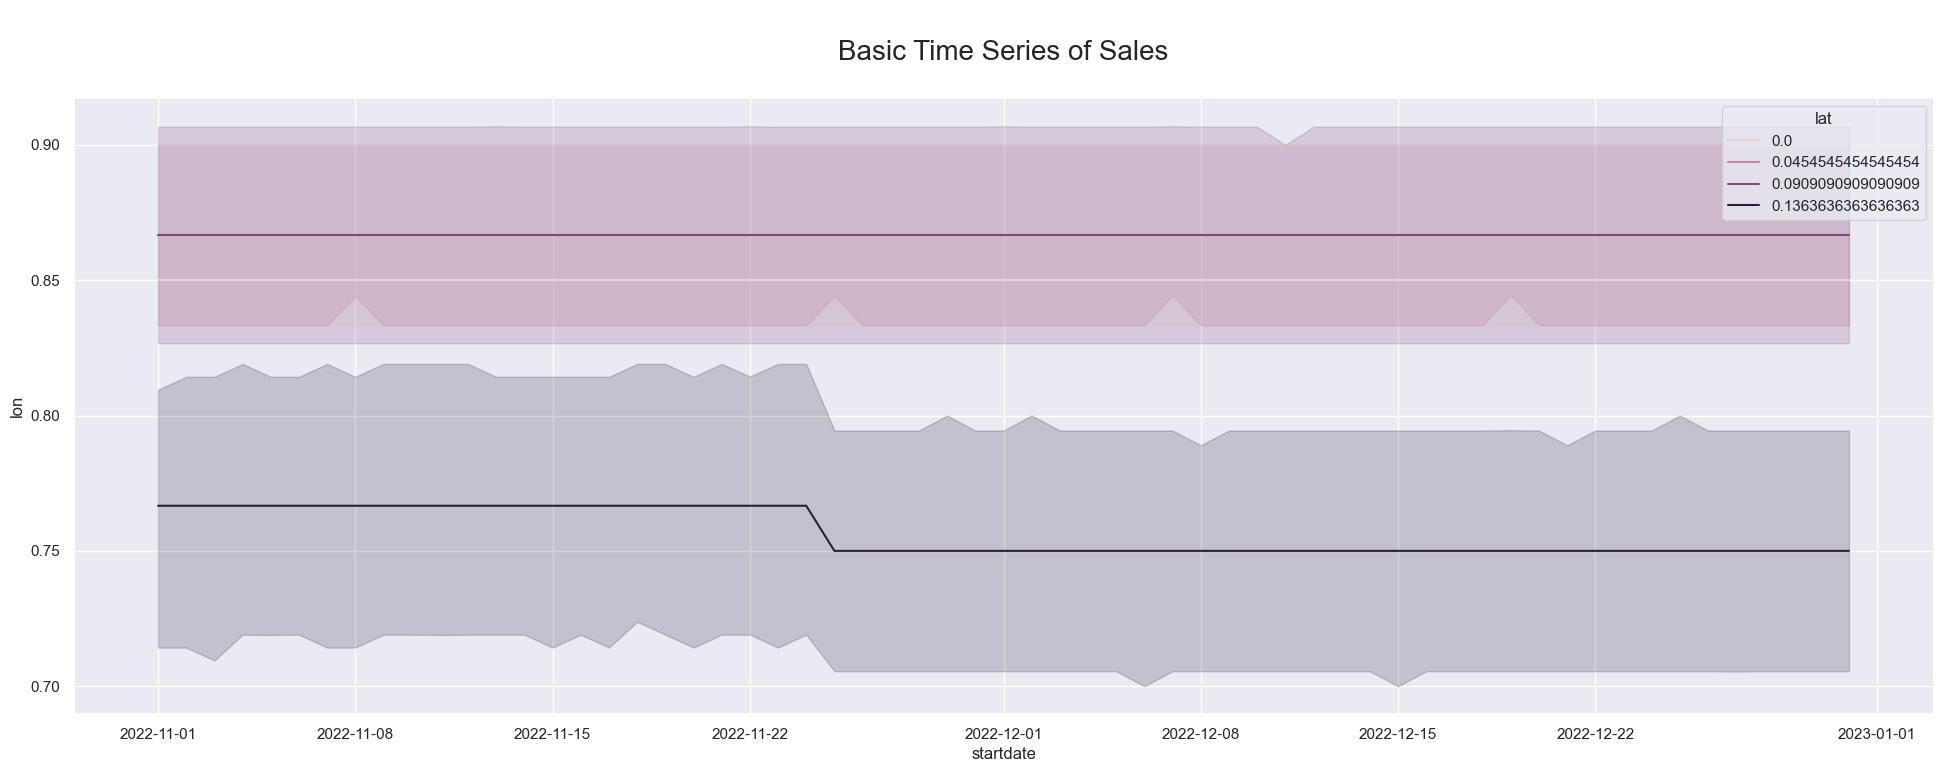

In [21]:
import seaborn as sns

sns.set(rc={"figure.figsize": (24, 8)})
ax = sns.lineplot(data=test_raw[0:1000], x="startdate", y="lon", hue="lat")
ax.axes.set_title("\nBasic Time Series of Sales\n", fontsize=20)


In [26]:
# print the number of rows in test data
print("Number of rows in test data: ", len(test_raw))
print(31354 / 61)


Number of rows in test data:  31354
514.0


<a id = "process"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Preprocessing Dataset</b></div>


In [51]:
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)


def location_nom(train, test):
    # Ref: https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved
    scale = 14

    train.loc[:, "lat"] = round(train.lat, scale)
    train.loc[:, "lon"] = round(train.lon, scale)
    test.loc[:, "lat"] = round(test.lat, scale)
    test.loc[:, "lon"] = round(test.lon, scale)

    all_df = pd.concat([train, test], axis=0)
    all_df["loc_group"] = all_df.groupby(["lat", "lon"]).ngroup()
    train = all_df.iloc[: len(train)]
    test = all_df.iloc[len(train) :].drop(target, axis=1)

    return train, test


def categorical_encode(train, test, feature_name):
    # le = LabelEncoder()
    # train['climateregions__climateregion'] = ohe.fit_transform(train['climateregions__climateregion'])
    # test['climateregions__climateregion'] = ohe.transform(test['climateregions__climateregion'])
    # return train, test
    # using OneHotEncoder
    ohe = OneHotEncoder()
    train_encoded = ohe.fit_transform(train[[feature_name]])
    test_encoded = ohe.transform(test[[feature_name]])

    train = train.drop([feature_name], axis=1)
    test = test.drop([feature_name], axis=1)

    train_encoded = pd.DataFrame(
        train_encoded.toarray(), columns=ohe.get_feature_names_out([feature_name])
    )
    test_encoded = pd.DataFrame(
        test_encoded.toarray(), columns=ohe.get_feature_names_out([feature_name])
    )

    train = pd.concat([train, train_encoded], axis=1)
    test = pd.concat([test, test_encoded], axis=1)

    return train, test


def fill_na(df):
    # TODO: fill na with mean or median
    df = df.sort_values(by=["loc_group", "startdate"]).ffill()
    return df


def add_season(df):
    month_to_season = {
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
        6: 2,
        7: 2,
        8: 2,
        9: 3,
        10: 3,
        11: 3,
        12: 0,
    }
    df["season"] = df["month"].apply(lambda x: month_to_season[x])


from sklearn.preprocessing import FunctionTransformer


def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


def encode_cyclical(df):
    # encode the day with a period of 365
    df["day_of_year_sin"] = sin_transformer(365).fit_transform(df["day_of_year"])
    df["day_of_year_cos"] = cos_transformer(365).fit_transform(df["day_of_year"])

    # encode the month with a period of 12
    df["month_sin"] = sin_transformer(12).fit_transform(df["month"])
    df["month_cos"] = cos_transformer(12).fit_transform(df["month"])


def creat_new_featute(df):
    df["year"] = df["startdate"].dt.year
    df["month"] = df["startdate"].dt.month
    df["day_of_year"] = df["startdate"].dt.dayofyear
    add_season(df)
    encode_cyclical(df)
    return df


# TODO: drop features with high correlation
def feature_engineering(train_raw, test_raw):
    train, test = location_nom(train_raw, test_raw)
    train = fill_na(train)
    train = creat_new_featute(train)
    test = creat_new_featute(test)
    train, test = categorical_encode(train, test, "climateregions__climateregion")
    train, test = categorical_encode(train, test, "season")

    drop_cols = ["index", "startdate", target]
    features = [col for col in train.columns if col not in drop_cols]
    X = train[features]
    X_test = test[features]
    y = train[target]

    return X, y, X_test


In [52]:
# class TemperatureDataset(Dataset):
#     def __init__(self, data):
#         self.scaler = StandardScaler()
#         self.data = self.scaler.fit_transform(data)

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         features = []
#         for i in range(14):
#             print(self.data[idx + i, -1])
#             # if the "loc_group" feature of self.data[idx + i] is the same as data[idx]
#             # then append the features of features
#             # if self.data[idx + i, -1] == self.data[idx, -1]:
#             # features.append(self.data[idx + i, :-1])
#         # features = self.data[idx : idx + 14, :-1]
#         target = self.data[idx + 14, -1]
#         return features, target


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Train and Validation</b></div>


In [53]:
X_train_all, y_train_all, X_test = feature_engineering(train_raw.copy(), test_raw.copy())
X_train, X_eval, y_train, y_eval = train_test_split(X_train_all, y_train_all, test_size=0.20, random_state=233)
print(
    f"Train_shape: {X_train.shape}    |   Val_shape: {X_val.shape}    |   Test_shape: {X_test.shape}"
)
y_test_approx = pd.read_csv('../../data/806.csv')[target]


Train_shape: (300587, 269)    |   Val_shape: (75147, 269)    |   Test_shape: (31354, 269)


<a id = "adv"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Adversarial Validation</b></div>

Adversarial Validation is a technique used to ensure that the distribution of data in the training set is similar to that of the test set. This is important because if the data in the training set is not representative of the test set, the model's predictions may not be accurate.

To perform Adversarial Validation, the following steps are taken:

1. Combine the train and test features into a single set
1. Create a target label to indicate whether a sample is from the train or test set
1. Build a model to classify samples as belonging to the train or test set

If the model is able to accurately distinguish between train and test samples, this indicates that there are features in the data that are different between the two sets. Adversarial Validation can be used to identify these features by using the feature importance generated by the model and evaluating the separation between the train and test datasets using the AUC metric.

Reference: Pan, J., Pham, V., Dorairaj, M., Chen, H., & Lee, J. Y. (2020). Adversarial validation approach to concept drift problem in user targeting automation systems at uber. [arXiv preprint arXiv:2004.03045](https://arxiv.org/abs/2004.03045).


In [37]:
import lightgbm as lgb


def run_adversial_validation(train_X_ml, test_X_ml):

    lgb_params = {
        "n_estimators": 100,
        "boosting_type": "gbdt",
        "objective": "binary",
        "metric": "auc",
        "verbose": 0,
    }
    # combine train & test features, create label to identify test vs train
    ad_y = np.array([1] * train_X_ml.shape[0] + [0] * test_X_ml.shape[0])
    ad_X = pd.concat([train_X_ml, test_X_ml])

    # evaluate model performance using cross-validation
    lgb_data = lgb.Dataset(ad_X, ad_y)
    cv_lgb = lgb.cv(lgb_params, lgb_data)

    print("Adversarial Validation AUC Score: {}".format(cv_lgb["auc-mean"][-1]))

    # train model & get feature importance
    ad_val_mod = lgb.train(lgb_params, lgb_data)

    print(
        pd.DataFrame(
            {"feat": ad_X.columns, "imp": ad_val_mod.feature_importance()}
        ).sort_values("imp", ascending=False)
    )

    return ad_val_mod


In [14]:
ad_val_mod = run_adversial_validation(X_train, X_test)


Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.201045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

It seems that there is a concept drift between train and test dataset and removing features like "contest-pevpr-sfc-gauss-14d**pevpr" and "nmme0-tmp2m-34w**cancm30" might help to increase the performance.


In [ ]:
# X.drop(['contest-pevpr-sfc-gauss-14d__pevpr','nmme0-tmp2m-34w__cancm30'], inplace = True)
# X_test.drop(['contest-pevpr-sfc-gauss-14d__pevpr','nmme0-tmp2m-34w__cancm30'], inplace = True)


<a id="bocat"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Bayesian Optimization for CatBoost</b></div>

[Here's](https://en.wikipedia.org/wiki/Bayesian_optimization) a wikipedia article about Bayesian Optimization, it's essentially a way to find good parameters by searching for these parameters sequentially. So the next parameter search values depend on the performance of the previous parameter values. This is a popular technique for finding optimal parameters. This may take some time to run. Also, you can tune many parameters, below are just some of the parameters that I choose to tune. For this notebook, I'm going to fix the number of estimators to be 100 to save time when running this notebook, but you can increase it to your liking or tune that parameter too if you'd like. You can change the number of iterations and initial points.


In [55]:
# source: https://medium.com/ai-in-plain-english/catboost-cross-validated-bayesian-hyperparameter-tuning-91f1804b71dd

from catboost import Pool, cv, CatBoostRegressor
from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization as BO
import warnings
from sklearn.model_selection import *
from sklearn.metrics import *

Use_BO = True

if Use_BO:
    # n_estimators,
    # num_leaves
    def CB_opt(
        depth,
        learning_rate,
        subsample,
        l2_leaf_reg,
        model_size_reg,
        random_strength,
        bagging_temperature,
    ):

        scores = []
        #     skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1944)
        # trainx, valx, trainy, valy = train_test_split(
        #     X1, Y1, test_size=0.33, random_state=42
        # )

        reg = CatBoostRegressor(
            verbose=0,
            iterations=500,
            # n_estimators = 10,
            learning_rate=learning_rate,
            subsample=subsample,
            l2_leaf_reg=l2_leaf_reg,
            max_depth=int(depth),
            # num_leaves = int(num_leaves),
            random_state=1212,
            # grow_policy = "Lossguide",
            #                                     max_bin = int(max_bin),
            use_best_model=True,
            # bootstrap_type='Bayesian',
            loss_function="RMSE",
            model_size_reg=model_size_reg,
            random_strength=random_strength,
            bagging_temperature=bagging_temperature,
        )

        reg.fit(X_train, y_train, eval_set=(X_eval, y_eval))
        y_eval_pred = reg.predict(X_eval)
        y_test_pred = reg.predict(X_test)
        scores.append(rmse(y_eval, y_eval_pred))
        print('performance of eval and test set: ', rmse(y_eval, y_val_pred), rmse(y_test_approx, y_test_pred))

        return 1 / np.mean(scores)

    # pbounds = {
    #     "depth": (5, 9),
    #     #    "learning_rate": (0.09, 0.1080689972639084),
    #     "learning_rate": (0.1, 0.1080689972639084),
    #     "subsample": (0.6, 0.900000011920929),
    #     "l2_leaf_reg": (2, 4),
    #     "model_size_reg": (0.48, 0.5),
    #     "random_strength": (0.9, 1.0),
    #     "bagging_temperature": (0.6, 1.5),
    # }
    pbounds = {
               "depth": (6, 7),
               "learning_rate": (0.09, 0.0980689972639084),
               "subsample":(0.7, 0.800000011920929),
               "l2_leaf_reg":(2,4),
               "model_size_reg": (0.48, 0.5)
    }

    optimizer = BayesianOptimization(
        f=CB_opt, pbounds=pbounds, verbose=2, random_state=1212
    )

    optimizer.maximize(init_points=5, n_iter=30) #, acq="ucb", alpha=1e-6)

    print(optimizer.max)

    max_bo_params = optimizer.max["params"]

    max_bo_params


|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... | model_... | random... | subsample |
-------------------------------------------------------------------------------------------------------------
performance of eval and test set:  0.544649709606762 0.9860562386887562
| 1         | 1.836     | 0.8208    | 8.217     | 2.349     | 0.1078    | 0.4845    | 0.9869    | 0.6844    |
performance of eval and test set:  0.5502183852278217 1.0590428801365663
| 2         | 1.817     | 1.253     | 8.01      | 2.493     | 0.1062    | 0.4817    | 0.9891    | 0.6654    |
performance of eval and test set:  0.7898323201079153 1.0426893593788156
| 3         | 1.266     | 1.441     | 5.362     | 3.615     | 0.1031    | 0.4989    | 0.9017    | 0.7625    |
performance of eval and test set:  0.5448202679818469 1.1010978903656716
| 4         | 1.835     | 0.8625    | 8.437     | 3.009     | 0.1058    | 0.4862    | 0.9266    | 0.6552    |
performance of eval and test set:  0.620536935648

In [61]:
Use_BO_result = False
NUM_ITERATIONS = 5000
if Use_BO_result:
    opt_params = {
        "iterations": NUM_ITERATIONS,
        "verbose": 100,
        "learning_rate": max_bo_params["learning_rate"],
        "subsample": max_bo_params["subsample"],
        "l2_leaf_reg": max_bo_params["l2_leaf_reg"],
        "max_depth": int(max_bo_params["depth"]),
        "use_best_model": True,
        "loss_function": "RMSE",
        "model_size_reg": max_bo_params["model_size_reg"],
        "random_strength": max_bo_params["random_strength"],
        "bagging_temperature": max_bo_params["bagging_temperature"],
    }
else:
    opt_params = {
        "iterations": 5000,
        "verbose": 100,
        'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : int(6.599144674342465),
          'use_best_model' : True, 
          'loss_function' : 'RMSE',
          'model_size_reg' : 0.4833187897595954
    }


In [62]:
## catBoost Pool object
train_pool = Pool(data=X_train, label=y_train)

# set verbose higher to see more information
bst = CatBoostRegressor(**opt_params)
bst.fit(
    train_pool,
    eval_set=(X_eval, y_eval),
    plot=True,
)  # silent=True)
print(bst.get_best_score())


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 9.0187120	test: 9.0106808	best: 9.0106808 (0)	total: 83.3ms	remaining: 6m 56s
100:	learn: 1.2420099	test: 1.2442133	best: 1.2442133 (100)	total: 3.74s	remaining: 3m 1s
200:	learn: 0.9781860	test: 0.9837171	best: 0.9837171 (200)	total: 6.68s	remaining: 2m 39s
300:	learn: 0.8431502	test: 0.8502174	best: 0.8502174 (300)	total: 9.73s	remaining: 2m 31s
400:	learn: 0.7576432	test: 0.7664870	best: 0.7664870 (400)	total: 12.8s	remaining: 2m 26s
500:	learn: 0.6945277	test: 0.7049782	best: 0.7049782 (500)	total: 15.9s	remaining: 2m 22s
600:	learn: 0.6482638	test: 0.6599588	best: 0.6599588 (600)	total: 19s	remaining: 2m 19s
700:	learn: 0.6108045	test: 0.6241989	best: 0.6241989 (700)	total: 22.2s	remaining: 2m 16s
800:	learn: 0.5817912	test: 0.5964820	best: 0.5964820 (800)	total: 25.3s	remaining: 2m 12s
900:	learn: 0.5550668	test: 0.5711409	best: 0.5711409 (900)	total: 28.8s	remaining: 2m 11s
1000:	learn: 0.5310096	test: 0.5482827	best: 0.5482827 (1000)	total: 32.1s	remaining: 2m 8s
1100

In [75]:
X_train_winter = X_train[X_train['season_0'] == 1]
y_train_winter = y_train[X_train['season_0'] == 1]
X_eval_winter = X_eval[X_eval['season_0'] == 1]
y_eval_winter = y_eval[X_eval['season_0'] == 1]
X_train_summer = X_train[X_train['season_2'] == 1]
y_train_summer = y_train[X_train['season_2'] == 1]
X_eval_summer = X_eval[X_eval['season_2'] == 1]
y_eval_summer = y_eval[X_eval['season_2'] == 1]

In [80]:
def test_summer(bst):
    y_summer_pred = bst.predict(X_eval_summer)
    print('performance of summer set: ', rmse(y_summer_pred, y_eval_summer))
def test_winter(bst):
    y_winter_pred = bst.predict(X_eval_winter)
    print('performance of winter set: ', rmse(y_winter_pred, y_eval_winter))
def test_eval(bst):
    y_pred = bst.predict(X_eval)
    print('performance of eval set: ', rmse(y_pred, y_eval))
def test(bst):
    y_test_pred = bst.predict(X_test)
    print('performance of test set: ', rmse(y_test_approx, y_test_pred))
    test_summer(bst)
    test_winter(bst)
    test_eval(bst)

In [66]:
submit[target] = bst.predict(X_test)
submit.to_csv("submission_pre_pseudo.csv", index=False)
test(bst)

performance of test set:  0.9766475150982057


<a id="fi"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Feature Importance</b></div>


Text(0.5, 1.0, 'Feature Importance')

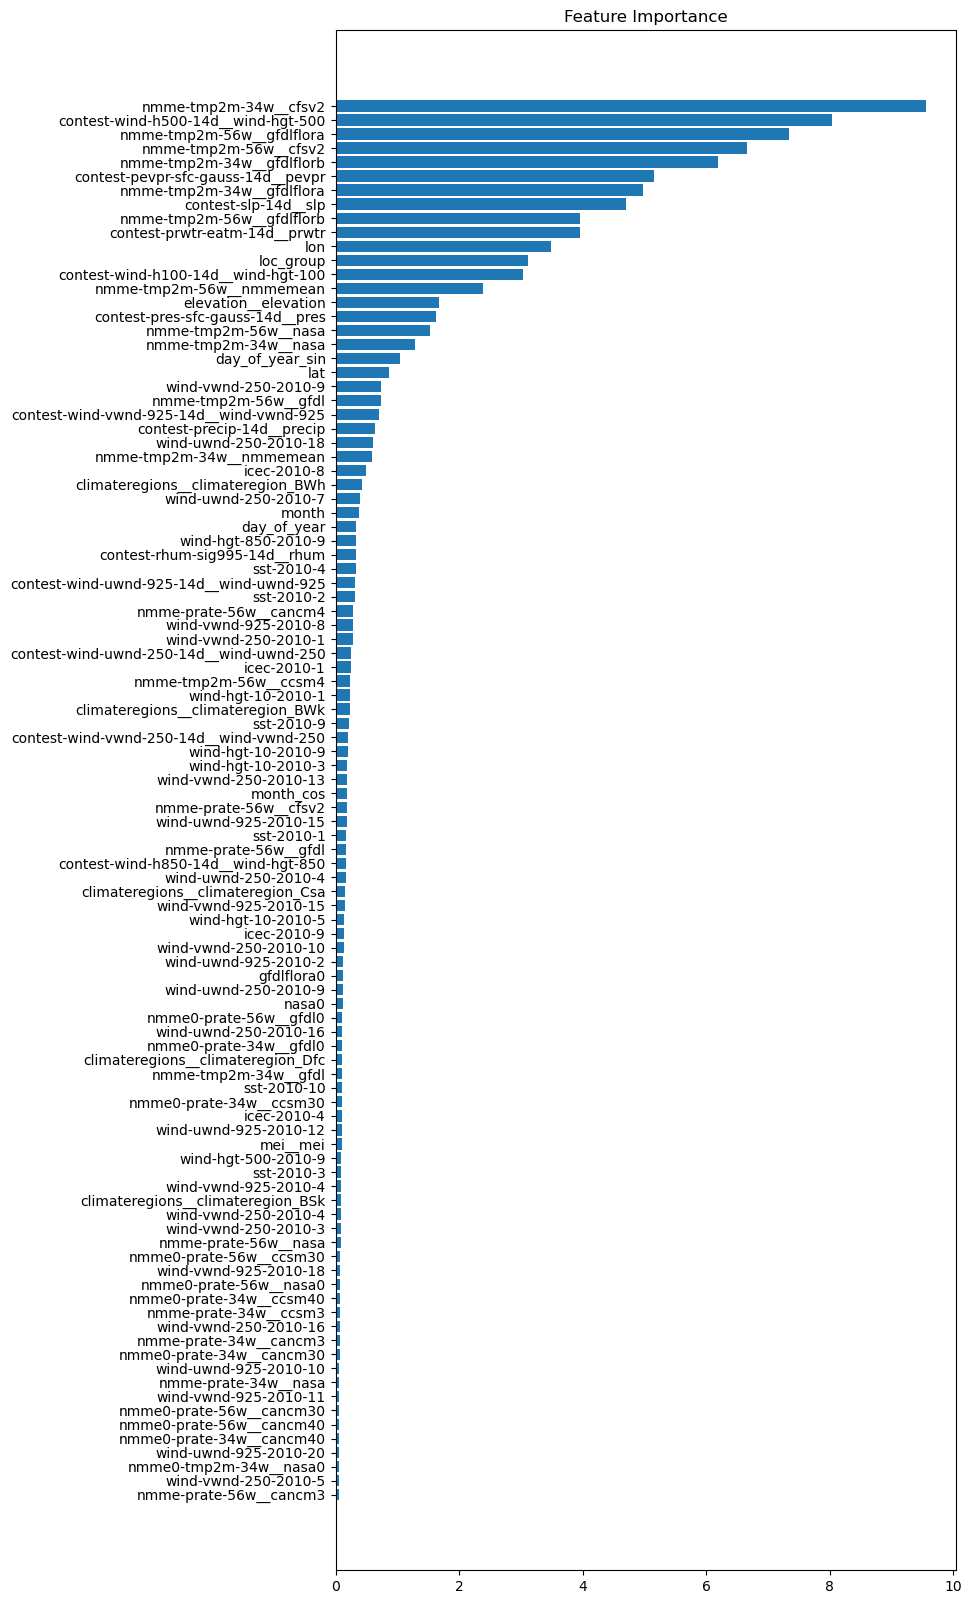

In [50]:
import matplotlib.pyplot as plt

feature_importance = bst.feature_importances_
max_features = 100
sorted_idx = np.argsort(feature_importance)[-max_features:]
fig = plt.figure(figsize=(8, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title("Feature Importance")


<a id = "xml"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Explainability</b></div>


<div style="text-align: justify;">In this section, we showcase a sample of SHAP explainability evaluation for our model. SHAP (SHapley Additive exPlanations) is a popular approach for providing model interpretability by measuring the contribution of each feature to a prediction. This enables us to identify which features have the greatest impact on our model's outputs, and how they are related to the predicted values. 
To perform the SHAP evaluation, we first generate a set of test data and extract the features we want to evaluate. We then use the SHAP library to compute the SHAP values for each feature, which represent the change in the predicted value as a result of changing the feature value while holding all other features constant. These values are visualized using a SHAP summary plot, which shows the features ranked by their importance and the direction of their impact on the predicted value. Through the SHAP summary plot, we can observe the top contributing features to our model's predictions, and how they are positively or negatively correlated with the output. This enables us to gain insights into the underlying relationships between the features and the target variable, improving our understanding of how our model makes its predictions. Overall, the SHAP explainability evaluation provides a valuable tool for gaining insights into the inner workings of our model and making informed decisions based on its outputs.</div>


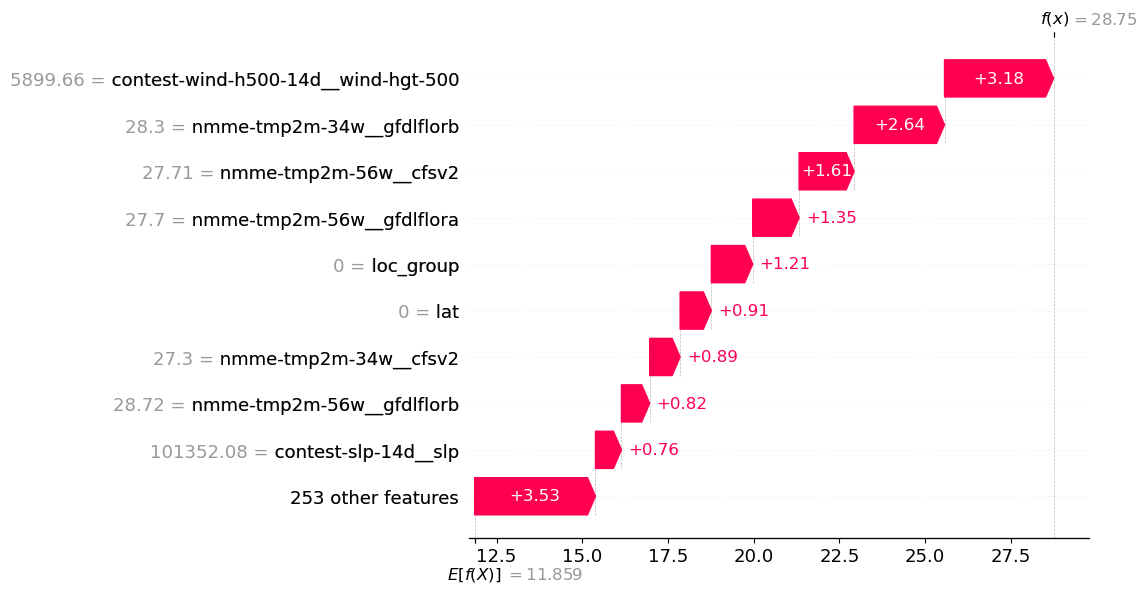

In [ ]:
import shap

explainer = shap.Explainer(bst)
shap_values = explainer(X1)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


<a id = "PL"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Pseudo Labeling and Postprocessing</b></div>


In [71]:
# Pseudo Labelling
X_pseudo = pd.concat([X_train, X_test], axis=0)
y_pseudo = pd.concat([y_train, y_test_approx], axis=0)
X_pseudo_train, X_pseudo_eval, y_pseudo_train, y_pseudo_eval = train_test_split(
    X_pseudo, y_pseudo, test_size=0.20, random_state=42
)
train_pool = Pool(data=X_pseudo_train, label=y_pseudo_train)

163305    21.759067
211771    -1.242665
352032     4.840678
196340     4.765940
157363     9.416685
            ...    
31349      6.293969
31350      6.276582
31351      5.607862
31352      6.051357
31353      6.284022
Name: contest-tmp2m-14d__tmp2m, Length: 331941, dtype: float64

In [72]:


# bst2 = CatBoostRegressor(**opt_params)
bst.fit(train_pool, eval_set=(X_pseudo_eval, y_pseudo_eval), plot=True, silent=True)
# print(bst2.get_best_score())


# train_mod = pd.concat([X_train.copy(), train_pseudo], axis=0).reset_index(drop=True)
# features = [c for c in X_test.columns if (c != "id")]
# display(train_mod)

# XX = train_mod[features]
# yy = train_mod[target]
# y_oof_pred = np.zeros(len(yy))

# X_testt = X_test[features].values
# y_test_pred2 = np.zeros(len(X_testt))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [81]:
submit[target] = bst.predict(X_test)
submit.to_csv("submission_aft_pseudo.csv", index=False)
test(bst)

performance of test set:  0.1860751915708734
performance of summer set:  0.26162743668654315
performance of winter set:  0.3308099510632109
performance of eval set:  0.2951262360131054


In [61]:
# y_pred_cat = bst2.predict(X_test)
# submit_cat = submit.copy()
# submit_cat[target] = y_pred_cat
# submit_cat.to_csv("y_pred_cat_self_pseudo.csv", index=False)


<a id = "EL"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Ensemble Learning</b></div>


In [23]:
import lightgbm as lgb

# set up parameters for LightGBM
params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "rmse",
    "max_depth": 4,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "early_stopping_round": 50,
    "n_estimators": 15000,
}

reg_lgb = lgb.LGBMRegressor(**params)

reg_lgb.fit(X_train3, y_trai3, eval_set=(X_test3, y_test3), verbose=100)


y_pred_lgb = reg_lgb.predict(X_test)

ensemble_preds = y_pred_lgb * 0.40 + y_pred_cat * 0.60


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[100]	valid_0's rmse: 0.270878
[200]	valid_0's rmse: 0.216232
[300]	valid_0's rmse: 0.188835
[400]	valid_0's rmse: 0.168992
[500]	valid_0's rmse: 0.152877
[600]	valid_0's rmse: 0.142579
[700]	valid_0's rmse: 0.133708
[800]	valid_0's rmse: 0.126779
[900]	valid_0's rmse: 0.12092
[1000]	valid_0's rmse: 0.116381
[1100]	valid_0's rmse: 0.111989
[1200]	valid_0's rmse: 0.108341
[1300]	valid_0's rmse: 0.105403
[1400]	valid_0's rmse: 0.102189
[1500]	valid_0's rmse: 0.099675
[1600]	valid_0's rmse: 0.097337
[1700]	valid_0's rmse: 0.0953608
[1800]	valid_0's rmse: 0.0932779
[1900]	valid_0's rmse: 0.0917453
[2000]	valid_0's rmse: 0.0903807
[2100]	valid_0's 

In [24]:
submit_lgb = submit.copy()
submit_lgb[target] = y_pred_lgb
submit_lgb.to_csv("y_pred_lgb.csv", index=False)


<a id="submit"></a>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Submission</b></div>


In [26]:
submit[target] = ensemble_preds
submit.to_csv("submission_combined.csv", index=False)


<a id = "list"></a>

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>List of Kaggle Notebooks Used as a Reference</b></div>


<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">

- [[WiDS 2023] Simple basline - RMSE 1.14](https://www.kaggle.com/code/ducanger/wids-2023-simple-basline-rmse-1-14) by [DAT DO](https://www.kaggle.com/ducanger) used as base especially for preprocessing.
- [🔥 EDA & ML on Game Play 🎮 (ongoing)](https://www.kaggle.com/code/nguyenthicamlai/eda-ml-on-game-play-ongoing) by [Nguyen Thi Cam Lai](https://www.kaggle.com/nguyenthicamlai) used for HTML-based headers
- [[WiDS 2021] Tips & Tricks (CatBoost Version)](https://www.kaggle.com/code/kooaslansefat/tips-tricks-catboost-version) used for hyperparameter tunning for CatBoost and adversarial validation
- [WiDS2023_Data_Buddies](https://www.kaggle.com/code/nicholasdominic/wids2023-data-buddies) by [Nicholas Dominic](https://www.kaggle.com/nicholasdominic) for Ensemble Learning


<center> <a href="#TOC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>


<div style="border-radius:10px;border:#034914 solid;padding: 15px;background-color:aliceblue;font-size:90%;text-align:left">

<h4><b>Authors :</b> Mojgan Hashemian and Koorosh Aslansefat </h4>  
    
<center> <strong> If you liked this Notebook, please do upvote. </strong>
    
<center> <strong> If you have any questions, feel free to contact us! </strong>


<center> <img src="https://gregcfuzion.files.wordpress.com/2022/01/kind-regards-2.png" style='width: 600px; height: 300px;'>
